### Extract Transform Load - The Movies Dataset

In [1]:
import pandas as pd
from sqlalchemy import create_engine
import json
import matplotlib.pyplot as plt

### import csv into DataFrame

In [2]:
movies_file = "Resources_new/movies.csv"
movies_df = pd.read_csv(movies_file)
movies_df.head(5)


movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [3]:
tags_file = "Resources_new/tags.csv"
tags_df = pd.read_csv(tags_file)
tags_df.head(5)

userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2    60756  Highly quotable  1445714996
2       2    60756     will ferrell  1445714992
3       2    89774     Boxing story  1445715207
4       2    89774              MMA  1445715200

In [4]:
ratings_file = "Resources_new/ratings.csv"
ratings_df = pd.read_csv(ratings_file)
ratings_df.head(5)

userId  movieId  rating
0       1        1     4.0
1       1        3     4.0
2       1        6     4.0
3       1       47     5.0
4       1       50     5.0

In [5]:
links_file = "Resources_new/links.csv"
links_df = pd.read_csv(links_file)
links_df.head(5)

movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0

## clean DataFrame for null and empty columns

In [6]:
movies_df = movies_df.dropna(how='any',axis=0)
movies_df.dropna(how='all', axis=1)

tags_df = tags_df.dropna(how='any',axis=0)
tags_df.dropna(how='all', axis=1)

ratings_df = ratings_df.dropna(how='any',axis=0)
ratings_df.dropna(how='all', axis=1)

links_df = links_df.dropna(how='any',axis=0)
links_df.dropna(how='all', axis=1)

movies_df.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

### Create a new DataFrame for Genre

In [7]:
genre_df = pd.DataFrame({"movieid": movies_df['movieId'], 
                           "genres": movies_df['genres']})
                             

In [8]:
genre_df.head()

movieid                                       genres
0        1  Adventure|Animation|Children|Comedy|Fantasy
1        2                   Adventure|Children|Fantasy
2        3                               Comedy|Romance
3        4                         Comedy|Drama|Romance
4        5                                       Comedy

In [9]:
genre_list = genre_df['genres']
movie_id_list=genre_df['movieid']
movie_genre_final_list=[]

import numpy as np
import re

for i in np.arange(len(movie_id_list)):
    line=genre_list[i]
    regex = re.compile('\|+')
    genre_name_list= regex.split(line)
    for j in np.arange(len(genre_name_list)):
            movie_genre_final_list.append({"movieid":movie_id_list[i],
                                             "genre_name":genre_name_list[j]})

In [10]:
genre_final_df=pd.DataFrame(movie_genre_final_list)

In [58]:
genre_final_df.head(10)

movieid genre_name
0        1  Adventure
1        1  Animation
2        1   Children
3        1     Comedy
4        1    Fantasy
5        2  Adventure
6        2   Children
7        2    Fantasy
8        3     Comedy
9        3    Romance

In [13]:
movies_df.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

### Clean Movies DataFrame

In [14]:
new = movies_df["title"].str.split(" \(", n = 1, expand = True)
movies_df["movie_name"]= new[0]
movies_df["release_year"]= new[1]
movies_df['release_year'] = movies_df['release_year'].str.slice(0, 4)

 

In [15]:
del movies_df['title']
del movies_df['genres']

In [16]:
movies_df.head()

movieId                   movie_name release_year
0        1                    Toy Story         1995
1        2                      Jumanji         1995
2        3             Grumpier Old Men         1995
3        4            Waiting to Exhale         1995
4        5  Father of the Bride Part II         1995

In [17]:
genre_final_df.head()

movieid genre_name
0        1  Adventure
1        1  Animation
2        1   Children
3        1     Comedy
4        1    Fantasy

### Convert Data Dictionary into DataFrame

In [18]:
import passwd
import getpass
#cpassword = getpass.getpass()

sql_stmt='postgresql://postgres:' + passwd.password + '/movies_db'

engine=create_engine(sql_stmt)
engine.table_names()

['links', 'movies', 'genre', 'cleaned_movies', 'tags']

In [20]:
movies_df = movies_df.dropna(how='any',axis=0)
movies_df.dropna(how='all', axis=1)
movies_df.to_sql(name='cleaned_movies', con=engine, if_exists='append', index=False)

In [21]:
pd.read_sql_query('select * from cleaned_movies', con=engine).head()

movieId                   movie_name release_year
0        1                    Toy Story         1995
1        2                      Jumanji         1995
2        3             Grumpier Old Men         1995
3        4            Waiting to Exhale         1995
4        5  Father of the Bride Part II         1995

In [22]:
genre_final_df.to_sql(name='genre', con=engine, if_exists='append', index=False)

In [23]:
pd.read_sql_query('select * from genre', con=engine).head()

movieid genre_name
0        1  Adventure
1        1  Animation
2        1   Children
3        1     Comedy
4        1    Fantasy

In [24]:
tags_df.to_sql(name='tags', con=engine, if_exists='append', index=False)

In [25]:
pd.read_sql_query('select * from tags', con=engine).head()

userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2    60756  Highly quotable  1445714996
2       2    60756     will ferrell  1445714992
3       2    89774     Boxing story  1445715207
4       2    89774              MMA  1445715200

In [26]:
links_df.to_sql(name='links', con=engine, if_exists='append', index=False)

In [27]:
pd.read_sql_query('select * from links', con=engine).head()

movieId  imdbId  tmdbId
0        1  114709     862
1        2  113497    8844
2        3  113228   15602
3        4  114885   31357
4        5  113041   11862

In [34]:
ratings_df.to_sql(name='ratings', con=engine, if_exists='append', index=False)


In [35]:
pd.read_sql_query('select * from ratings', con=engine).head()

userId  movieId  rating
0       1        1     4.0
1       1        3     4.0
2       1        6     4.0
3       1       47     5.0
4       1       50     5.0

In [47]:
pd.read_sql_query('select * from cleaned_movies', con=engine).head()

movieId                   movie_name release_year
0        1                    Toy Story         1995
1        2                      Jumanji         1995
2        3             Grumpier Old Men         1995
3        4            Waiting to Exhale         1995
4        5  Father of the Bride Part II         1995

In [28]:
genre_group_df = genre_final_df.groupby('genre_name').count()

In [29]:
genre_group_df.head()

movieid
genre_name                 
(no genres listed)       34
Action                 1828
Adventure              1263
Animation               611
Children                664

<AxesSubplot:xlabel='genre_name'>

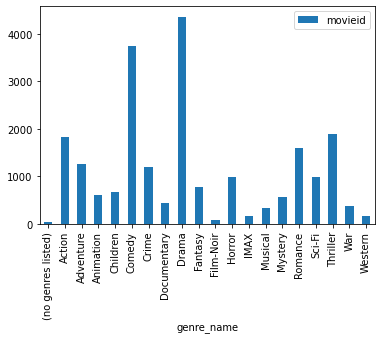

In [30]:
genre_group_df.plot(kind='bar')

In [48]:
rating_group_df = ratings_df.groupby('rating').count()

<AxesSubplot:xlabel='rating'>

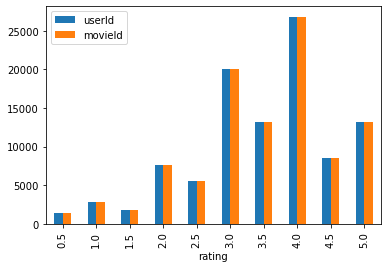

In [49]:
rating_group_df.plot(kind='bar')